# 7 機械学習の基礎（教師あり学習）

7章からは、機械学習について解説していきます。機械学習は、何かしらの目的を達成するための知識や行動を、データを読み込ませることで機械に獲得させるための技術です。機械学習は大きく、教師あり学習、教師なし学習、強化学習に分けられ、7章では、教師あり学習の具体的手法について学びます。この章を通し、機械学習の考え方とモデル構築の基本作法を理解し、正しく実行できるようになりましょう。


ゴール：機械学習の体系と概要を学び、モデル構築や評価を正しく実行できるようになる

- **[7.1 機械学習の全体像](#7.1-機械学習の全体像)**
    - [7.1.1 機械学習とは](#7.1.1-機械学習とは)
    - [7.1.2 教師あり学習](#7.1.2-教師あり学習)
    - [7.1.3 教師なし学習](#7.1.3-教師なし学習)
    - [7.1.4 強化学習](#7.1.4-強化学習)
    - [7.1.5 この章で使うライブラリのインポート](#7.1.5-この章で使うライブラリのインポート)
<br><br>
- **[7.2 重回帰](#7.2-重回帰)** 
    - [7.2.1 自動車価格データの取り込み](#7.2.1-自動車価格データの取り込み)
    - [7.2.2 データの整理](#7.2.2-データの整理)
    - [7.2.3 モデル構築と評価](#7.2.3-モデル構築と評価)
    - [7.2.4 モデル構築とモデル評価の流れのまとめ](#7.2.4-モデル構築とモデル評価の流れのまとめ)
<br><br>
- **[7.3 ロジスティック回帰](#7.3-ロジスティック回帰)** 
    - [7.3.1 ロジスティック回帰の例](#7.3.1-ロジスティック回帰の例)
    - [7.3.2 データの整理](#7.3.2-データの整理)
    - [7.3.3 モデル構築と評価](#7.3.3-モデル構築と評価)
    - [7.3.4 スケーリングによる予測精度の向上](#7.3.4-スケーリングによる予測精度の向上)
<br><br>
- **[7.4 正則化項のある回帰：ラッソ回帰、リッジ回帰](#7.4-正則化項のある回帰：ラッソ回帰、リッジ回帰)** 
    - [7.4.1 ラッソ回帰、リッジ回帰の特徴](#7.4.1-ラッソ回帰、リッジ回帰の特徴)
    - [7.4.2 重回帰とリッジ回帰の比較](#7.4.2-重回帰とリッジ回帰の比較)
<br><br>
- **[7.5 決定木](#7.5-決定木)** 
    - [7.5.1 キノコデータセット](#7.5.1-キノコデータセット)
    - [7.5.2 データの整理](#7.5.2-データの整理)
    - [7.5.3 エントロピー：不純度の指標](#7.5.3-エントロピー：不純度の指標)
    - [7.5.4 情報利得：分岐条件の有益さを測る](#7.5.4-情報利得：分岐条件の有益さを測る)
    - [7.5.5 決定木のモデル構築](#7.5.5-決定木のモデル構築)    
<br><br>
- **[7.6 k-NN（k近傍法）](#7.6-k-NN（k近傍法）)** 
    - [7.6.1 k-NNのモデル構築](#7.6.1-k-NNのモデル構築)
<br><br>
- **[7.7 サポートベクターマシン](#7.7-サポートベクターマシン)** 
    - [7.7.1 サポートベクターマシンのモデル構築](#7.7.1-サポートベクターマシンのモデル構築)
<br><br>
- **[7.8 総合問題](#7.8-総合問題)**
    - [■ 総合問題7-1 教師あり学習の用語（1）](#■-総合問題7-1-教師あり学習の用語（1）)
    - [■ 総合問題7-2 決定木](#■-総合問題7-2-決定木)
    - [■ 総合問題7-3 ノーフリーランチ](#■-総合問題7-3-ノーフリーランチ)

## 7.1 機械学習の全体像
ゴール：機械学習の体系と教師あり学習、教師なし学習の概要を知る

この章では、教師あり学習の具体的手法について学びます。教師あり学習は、機械学習の中で最もビジネス活用が進んでいる技術です。この章を通し、機械学習の考え方とモデル構築の基本作法を理解し、正しく実行できるようになりましょう。

教師あり学習の話に入る前に、教師なし学習なども含めて、まずは、機械学習の全体像を俯瞰してみましょう。

### 7.1.1 機械学習とは
キーワード：機械学習、教師あり学習、教師なし学習、強化学習

**機械学習（machine learning）**は、何かしらの目的を達成するための知識や行動を、データを読み込ませることで機械に獲得させるための技術です。機械学習は大きく、**教師あり学習（supervised learning）**、**教師なし学習（unsupervised learning）**、**強化学習（reinforcement learning）**に分けられます。この分け方以外にも、教師あり学習と教師なし学習の2つに分けたり、これらの3つに、さらに半教師あり学習を加えて4つに分けることもあります。

#### 教師あり学習と教師なし学習

機械に読み込ませて知識や行動を獲得させるために使うデータのことを訓練データと言います。
教師あり学習と教師なし学習の違いは、訓練データに、目的変数や説明変数（後述）があるかどうかです。端的に言うと、正解のデータがあってそれを与えるのが教師あり学習、そうでないのが教師なし学習です。

①教師あり学習

説明変数（インプット）から目的変数（アウトプット）を予測するモデルを求める手法です。訓練データには目的変数や説明変数があり、あらかじめ作ったモデルに訓練データの説明変数を入力し、そのモデルからの出力が訓練データの目的変数に近づくようにモデルのパラメータを調整することで学習していきます。この章で詳しく説明します。

たとえば、メールのタイトルや内容（説明変数）からスパムか否か（目的変数）を識別したい、株の売買状況（説明変数）から株価（目的変数）を予測したいときなどに使われます。

②教師なし学習

入力データそのものに着目し、データに潜むパターンや示唆を見いだす手法です。訓練データに目的変数や説明変数はありません。多数のデータをいくつかの類似グループに分けるクラスタリングや、データ次元（変数の数）を、元のデータの情報を失わないようにより少数の次元に縮約する主成分分析（PCA:Principle Component Analysis）などの手法があります。データに解釈を与える探索的分析やデータの次元圧縮（dimentional reduction）などに使われます。こちらは次の章で詳しく説明します。なお、次元圧縮は教師あり学習もありますが、次の章で扱うのは教師なし学習の次元圧縮です。

#### 強化学習

強化学習は、プログラム（機械）の一連の行動の結果に対して報酬を与えることで、機械に実現させたい知識や行動ルールを獲得させようとする手法です。教師あり学習では1つ1つの行動に正解データを付与する必要がありますが、特に対戦相手のいるゲームなど相互作用的な環境下で行動ルールを獲得する必要がある場合、すべての局面に対して正解データを付与することは困難です。

そのため、一連の行動の結果に基づく報酬によって行動ルールを獲得させようとする強化学習技術という手法は、教師あり学習では表現困難なケースを扱える学習方式として、近年注目を集めています。

#### 機械学習を適用するにあたって

本書では、与えられたデータに対して機械学習を適用するところから始めますが、実際のデータ分析の現場においては、「基本統計量を取得する」「ヒストグラムや散布図を作成する」など、データの基本的な観察と理解を怠らないようにしましょう。データの品質は機械学習のアウトプットの品質にも大きな影響を与えるためです。また、そのような一連の確認作業からデータ上の有益な気付きを得られることもあります。機械学習を使うことを目的とせず、あくまで1つの手段であることを留意しておきましょう。

>**[ポイント]**
>
>現場でデータ分析をするときは、機械学習を適応する前に、基本統計量や散布図を作成し、データの傾向や全体像を抑えましょう。

機械学習の入門者には、参考文献「A-18」や参考URL「B-24」が参考になるでしょう。

ビジネス的な視点で機械学習を活かすことを学ぶには参考文献「A-19」などが参考になります。

また、1冊の専門書で機械学習のモデルや実装に関する情報をすべて記載するのは無理なので、何かわからないこと（パラメータの設定など）があった場合、大事になるのは公式ドキュメント
に戻ることです。公式ドキュメントはぎっしり書いてあってなかなか読み切れるものではないですが、モデルの細かなパラメータ等の説明がありますので、確実です。

>**[ポイント]**
>
>機械学習等のモデルでパラメータやモデルの特性などわからないことがあれば、まずは公式ドキュメントを調べましょう。

### 7.1.2 教師あり学習
キーワード：目的変数、説明変数、回帰、分類

教師あり学習は、訓練データを与えて、そこに含まれる正解データを予測するためのモデルを構築する手法です。先に説明したとおり、訓練データの中で予測したい変数のことを**目的変数**（他には正解データ、応答変数、ターゲット変数、従属変数などとも呼ばれます）、目的変数を説明するための変数のことを**説明変数**と言います（他には特徴量、予測変数、独立変数などとも呼ばれます）。

$y=f(x)$という関数があるとすると、$y$が目的変数、$x$が説明変数、関数$f(x)$がモデルです。たとえば、ある消費財ブランドの購買者が、将来ブランド非購買になるか否か（目的変数）を予測したいときは、過去のさまざまなデータ（顧客属性、購買頻度、関連ブランドの購入有無など）を説明変数として扱います。

#### 教師あり学習の手法

教師あり学習は目的変数のデータ形式によって、いくつかの種類に分類できます。目的変数が株価など数値を取る場合を**回帰(regression)**、「男性・女性」「幼児・小学生・学生・大人」などのカテゴリになる場合を**分類（classification）**といいます。たとえば先ほどのブランド非購買になるか否かのケースは、「購入する」か「購入しないか」の2つのカテゴリに分ける分類タスクです。

教師あり学習のアルゴリズム（手法）には、**重回帰（multiple linear regression）、ロジスティック回帰（logistic regression）、k近傍法（k-Nearest Neighbors）、決定木（Decision Tree）、サポートベクターマシン（Support Vector Machine）、ランダムフォレスト（Random Forest）、勾配ブースティング（Gradient Boosting）**等があります。これらの手法は、回帰で使われるときもあれば、分類で使われるときもあるので、注意しましょう。

たとえば、ロジスティック回帰は回帰という名前がついていますが、分類の用途で使われます。決定木は一般的に分類に使う手法ですがこの場合は分類木といい、回帰の場合は回帰木といいます。後に個別に説明します。

どの手法を選択するのかは、求めるモデルの性能で決めるのが基本です。しかし学習結果の解釈性（interpretability/解釈しやすさ）を優先したい場合は重回帰、ロジスティック回帰、決定木などの比較的シンプルな手法を意図的に採用することもあります。サポートベクターマシンなどは説明がしにくく、非専門家が1回聞いてすぐに理解できる手法ではないためです（機械学習で「決定木」は理解しやすいという記載もありますが、非専門家にとっては必ずしもわかりやすい概念ではないことを留意しておきましょう）。解釈性を優先すべき局面なのか、解釈よりも精度を追求すべき局面なのかについては、ケースバイケースで判断するようにしましょう。

### 7.1.3 教師なし学習
キーワード：クラスタリング、主成分分析、マーケットバスケット分析

教師なし学習は目的変数がなく入力データそのものに注目した学習で、データに潜むパターンや示唆を見出そうとするものです。

#### 教師なし学習の手法

教師なし学習の代表的な手法が、多数のデータをいくつかの類似のグループに分ける**クラスタリング（clustering）**です。たとえば、ある消費者がどのような嗜好グループに分かれるかといったマーケティング分析などに使われます。

クラスタリングは、データそのものの特徴を探す手法であることから、探索的なデータ分析手法とも位置づけられます。クラスタリング結果に基づき対象データをグルーピングしたら終わりではなく、そこに解釈を与えそれがビジネスなどの現場感覚とズレていないかを確認することは重要です。探索的なデータ分析では完全な自動化は難しく、人の判断が重要な役割を担うことを留意しましょう。

教師なし学習にはほかにも、**主成分分析（Principle Component Analysis）**や**マーケットバスケット分析（Market Basket Analysis）**などがあります。主成分分析は、多数の変数をそれらの情報を失わないように縮約して、変数を減らす分析手法です。マーケットバスケット分析はPOS（Point of Sales）といわれる購買データ等の分析に使われ、ある商品Aを買っている人は高い確率である商品Bも買っている、といったアソシエーションルール（関連性の強い事象の組み合わせのこと）を求めてくれる分析手法です。

参考文献「A-20」に挙げている書籍では、教師あり学習を「目的志向的データマイニング」、教師なし学習を「探索的データマイニング」と大別しており、ビジネスの現場でどのように機械学習やデータマイニングが使われているかを学ぶことができます。ビジネス視点から本書の理解を更に深めたい方にはオススメです。なお、参考文献「A-20」のうち上2つは翻訳本で原書の一部分がカットされていますので、英語が読める方は原書が良いでしょう。

### 7.1.4 強化学習
キーワード：動的計画法、モンテカルロ法、TD学習

強化学習は、ある報酬を最大化するために何をすべきかの行動ルールを、機械に学習させるための技術です。報酬は機械の一連の行動の結果に対し目的と整合するように設計します。つまり望ましい結果には高い報酬を、望ましくない結果には低い報酬を与えるようにします。教師あり学習のように1つ1つの行動に対する正解データは与えられず、その代わりどのような行動を取ったら最終的により大きな報酬を得られるかを見つけ出そうとします。強化学習では、機械（エージェント）が存在する環境、および他のエージェントとの相互作用の中で学習が進みます。

実例で言うとたとえば、「赤ちゃん（エージェント）は歩き方を教わっていないのに自分がおかれている環境の中から試行錯誤しながら歩けるようになる」「自動車（エージェント）が他の自動車（他のエージェント）と衝突することなく走行できるようになる」などが、強化学習の例となります。

#### 強化学習の手法

強化学習ではエージェントが探索的に行動し、環境との相互作用の中から学習が進むため、探索と知識利用のジレンマ（Exploration-Exploitation Dilemma）をどのように扱うかが重要なテーマです。これは、過去の行動から学んだ結果を踏まえて「一番良い行動」を取っていたら新しい行動を見つけられなくなるし（知識に偏る）、「もっと良い行動」を求めて新しい行動ばかりしていると過去の経験を活かせない（探索に偏る）ので、探索と知識利用のバランスをどうとるかが難しい、ということです。

強化学習のアプローチには動的計画法、モンテカルロ法やTD学習などがあります。動的計画法は明示的な知識があることを前提としますが、モンテカルロ法は環境における完全な知識を必要とせず経験のみを必要とする方法です。なお本書では、強化学習については概念の紹介までとします。さらに学習を深めたい方は、上記までに登場した用語を参考に、参考文献「A-21」や参考URL「B-26」のOpenAIのサイトなどを参照して下さい。

### 7.1.5 この章で使うライブラリのインポート

この章では、以前紹介した各種ライブラリのほか、機械学習ライブラリのScikit-learnを使います。

Scikit-learnは、単回帰分析の際にも使いました。上記でも紹介しましたが、参考URL「B-27」のScikit-learnの公式ドキュメントには、詳細な仕様や使い方が記されているので、参考にしてください。Sciklt-learnのライブラリには、機械学習用のクラスだけでなくサンプルデータもいくつか含まれています。

この章では、次のようにインポートしていることを前提として進めていきます。

In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'


## 7.2 重回帰
キーワード：目的変数、説明変数、多重共線性、変数選択法

教師あり学習の1つ目として、まずは、**重回帰（multiple lienar regression）**について学びます。以前扱った単回帰では目的変数に対して説明変数は1つでした。この考え方を拡張し、説明変数が1つではなく複数ある場合を扱うのが重回帰です。重回帰によって、各説明変数の係数（回帰係数）が推定され予測値を計算できます。回帰係数は予測値と目的変数の2乗誤差が最小になるように推定されます。以下が重回帰の図解です。


![](http://diary-ba.up.n.seesaa.net/diary-ba/image/E9878DE59B9EE5B8B0E5BC8FE383A2E38387E383AB.png?d=a1)

参照URL:http://diary-ba.up.n.seesaa.net/diary-ba/image/E9878DE59B9EE5B8B0E5BC8FE383A2E38387E383AB.png?d=a1

### 7.2.1 自動車価格データの取り込み

それでは、実際にやってみましょう。ここでは、自動車の価格とそれらの属性（自動車の大きさなど）データがあるとき、その属性から自動車価格を予測するモデルを重回帰を使って構築してみます。
データは、次のURLで公開されているものを利用します。

http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [2]:
# インポート
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
auto.columns =['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
                            'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
                            'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
                            'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

上記のプログラムを実行すると、変数`auto`にPandasの`DataFrame`オブジェクトとして、自動車価格データが設定されます。
実際に、どのようなデータなのか確認してみましょう。

In [3]:
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(205, 26)


205行、26列のデータであることが分かります。

続いて次のように`head()`メソッドで、最初の5行を表示してみます。

In [4]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


このデータにおいて、自動車の価格は`price`に設定されています。ここでは自動車の属性から価格を予測するモデルを作ろうとしているのですから、`price`以外の値から`price`を予測するモデルを作るというのが課題となります。

すべての説明変数から`price`を予測するのは複雑なので、この課題では、`horsepower`、`width`、`height`の3つの説明変数だけを使うものとします。つまり、`horsepower`、`width`、`height`という説明変数から`price`という目的変数を予測するというモデルを作成していくものとします。

### 7.2.2 データの整理

入力データには不適切なものが含まれていることがあります。そこでまずは、データの内容を確認して適切なデータとして整理します。

#### 不適切なデータの除去

先ほど`head()`を使ってデータを確認しましたが、このとき、データの中に'?'のあることに気づきます。多くの機械学習のアルゴリズムは、数値型データしか扱えないため、このような「?」などの非数値データを含む変数に対しては、それを取り除く前処理が必要です。

今回の目的は`horsepower`、`width`、`height`から`price`を予測することなので、これらの変数に'?'データがあれば削除します。具体的には、'?'データを欠損値に変換をした上で欠損値を含む行を除外します。扱おうとしている`horsepower`、`width`、`height`、`price`の4つ変数に'?'データが、どれだけ含まれているのかは、次のプログラムで確認できます。

In [5]:
# それぞれのカラムに ? が何個あるかカウント
auto = auto[['price', 'horsepower', 'width', 'height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

`price`と`horsepower`に'?'データが混入していることがわかるので、以前学んだPandasのテクニックを使って除外します。次のようにすると'?'がある行が除去されます。実行すると、行数が減っていることが確認できます。

In [6]:
# '?'をNaNに置換して、NaNがある行を削除
auto = auto.replace('?', np.nan).dropna()
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(199, 4)


#### 型の変換
ここでデータの型を確認しておきましょう。次のようにして確認します。

In [7]:
print('データ型の確認（型変換前）\n{}\n'.format(auto.dtypes))

データ型の確認（型変換前）
price          object
horsepower     object
width         float64
height        float64
dtype: object



確認すると`price`と`horsepower`が数値型ではないことがわかります。そこで`to_numeric`を使って数値型に変換しておきます。

In [8]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print('データ型の確認（型変換後）\n{}'.format(auto.dtypes))

データ型の確認（型変換後）
price           int64
horsepower      int64
width         float64
height        float64
dtype: object


#### 相関の確認

以上の操作で、説明変数、目的変数のすべての行は、欠損が無くかつ数値型のデータ形式に加工されました。
続けて各変数の相関を確認します。次のように`corr`を使うと、相関を確認できます。

In [9]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


`price`が今回の目的変数なので、それ以外の3変数に注目をすると、`width`と`horsepower`の相関が0.6程度と、やや高いことに気づきます。なぜこのような確認をしているかというと、相関の高い変数を同時に重回帰の説明変数とすると、**多重共線性（multi-collinearity）**が生じる可能性があるからです。


多重共線性とは変数間の高い相関のために回帰係数の分散が大きくなり、係数の有意性が失われてしまう現象です。このような現象を回避すべく、通常、重回帰のモデル構築においては、相関の高い変数群からは代表となる変数だけをモデルに使用します。しかしここでは実験なのでそこまで厳密に考えず、`width`と`horsepower`の両方を、`height`と一緒に残してモデル構築を進めることとします。



### 7.2.3 モデル構築と評価

データが揃ったのでモデルを構築してみましょう。重回帰のモデルを作り、その性能を調べるプログラムは下記のようになります。

下記のプログラムでは、説明変数を$X$、目的変数を$y$に設定しています。

機械学習のモデル構築では、「モデル構築に使用する訓練データ」を使って学習させてモデルを構築し、そのモデルに訓練データとは別の「テストデータ」を入れて、そのテストデータに対して、どの程度の精度が得られるのかを確認することで性能を調べるのが一般的です。そこで以下では、Scikit-learnの`model_selection`モジュールの`train_test_split`関数を使い、訓練データとテストデータに分けています。

この関数はデータをランダムに2つに分ける関数です。どのような割合で分類するのかは`test_size`で決めます。ここでは`test_size`を0.5にしているので半分ずつに分かれます（たとえば、0.4にすると4対6に分けることもできます）。

`ramdom_state`はランダムの度合いを設定するものです。ここでは`random_state`を0に設定しています。このように`random_state`を固定する（この場合は0に設定する）とランダム性がなくなり、何度実行しても、同じように分離されます。もし0でないと、実行のたびに、ある行が訓練データに分類されたりテストデータに分類されたりとまちまちになるので、結果が一定となりません。ですから実務では、`random_state`を固定して再現性を持たせることは、とても重要です。


重回帰のモデル構築は、`LinearRegression`クラスを使って行います。「`model = LinearRegression()`」でインスタンスを作成して、訓練データを「`model.fit(X_train, y_train)`」のように読み込ませると学習が完了します。学習したら、決定係数や回帰係数、切片を確認できます。決定係数とは、目的変数によって予測された値が、実際の目的変数の値とどのくらい近いかを示す値です。

機械学習の目的は高い汎化性能の獲得（構築したモデルによって、未知データでも適切に予測できること）ですから、訓練データへのあてはまりを追求すれば良いモデルになりそうですが、実際はそうではなく、訓練データに対する精度は良いがテストデータに対する精度が低くなるということがしばしば起きます。このことを**過学習（overfitting）**もしくは**過剰学習**と呼び、モデル構築の段階において過学習になっていないかを検証します。詳しくは、後の章で学びます。

In [10]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

 # 目的変数にpriceを指定、説明変数にそれ以外を指定
X = auto.drop('price', axis=1)
y = auto['price']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train, y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test, y_test)))
 
# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.733
決定係数(test):0.737

回帰係数
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
切片: -128409.046


決定係数は`score`メソッドで取得できます。上記の結果では、`train`（訓練データ）で0.733、`test`（テストデータ）で0.737とわかります。訓練時スコアとテスト時のスコアが近いことから、このモデルは過学習に陥ってはいないと判断できます。

### 7.2.4 モデル構築とモデル評価の流れのまとめ

以上が重回帰によるモデル構築とモデル評価の流れです。以下で学ぶ決定木やSVMなども基本的に同じ流れで実行していきます。つまり、以下の流れがモデル構築とモデル評価の基本であることを押さえましょう。

- 各種モデル構築のためのクラスの初期化：`model = LinearRegression()`
- データを説明変数と目的変数に分ける：$X$と$y$
- 訓練データとテストデータに分ける：`train_test_split(X, y, test_size=0.5, random_state=0)`
- 訓練データによるあてはめ（学習）：`model.fit(X_train, y_train)`
- モデルの汎化性能をテストデータで確かめる：`model.score(X_test, y_test)`

ここでは、モデル構築の際、使用する説明変数として`horsepower`、`width`、`height`の3つを恣意的に選択しましたが、統計的に選択する方法もいくつかあります。具体的には、**変数増加法（前進的選択法）**、**変数減少法（後退的選択法）**、**ステップワイズ法**などで、選択するための規準も、RMSE（Root Mean Squared Error）、赤池情報量規準（AIC）、ベイズ情報量規準（BIC）などがあります。これらも絶対的にこの方法が有効というものではなく、モデルの汎化性能であったりビジネスドメイン知識なども考慮され選択されます。上記方法についての詳細は本書では割愛しますので、さらに学習を深めたい方は調べてみてください。

>**[やってみよう]**
>
>変数増加法、変数減少法、ステップワイズ法について調べてみましょう。

####  <練習問題 7-1>
本編で利用した自動車価格データを利用します。
このデータに対して、目的変数を`price`とし、説明変数に`length`と`engine-size`を使って重回帰のモデル構築をしてみましょう。このとき`train_test_split`を使って訓練データとテストデータが半分になるように分けてモデルを構築し、テストデータを使って、モデルのスコアを求めてください。`train_test_split`を実行する際には、`random_state`オプションを0に設定してください。

####  <練習問題 7-2>
<練習問題 7-1>のデータに対して、目的変数は同じ`price`で、上記とは別の説明変数を使って重回帰のモデル構築をしてみましょう。ただし、訓練データとテストデータが半分になるように分けて学習して、テストデータでスコアを求めてください。なお、訓練データとテストデータ分ける関数の`random_state`は0に設定して実施してください。モデルの結果がどのように変わったでしょうか。またその原因を考察してみましょう。

## 7.3 ロジスティック回帰
キーワード：ロジスティック回帰、交差エントロピー誤差関数、オッズ比

先に見てきたとおり、重回帰モデルは説明変数が複数ある回帰モデルで、目的変数は数値でした。このような変数を数値変数と言います。

本節で学ぶ**ロジスティック回帰（logistic regression）**は目的変数が数値ではなく、たとえば、ある商品を買うか買わないか、ある会社が倒産するかしないかといった、カテゴリのデータを扱うアルゴリズムです。このようにカテゴリの形になっている変数をカテゴリ変数と言います。

データサンプルが、あるカテゴリに属するかどうかの確率を計算するタスクを分類（classification）といい、そのためのアルゴリズムの1つがロジスティック回帰です。

回帰という名前がついていますが、分類を扱うアルゴリズムですので注意しましょう（また、2分類だけではなく3分類以上についても使えます）。目的変数が数値の時と違い、分類タスクでは以下の目的関数が最小になるように学習します。この目的関数を**交差エントロピー誤差関数（cross-entropy error function）**と言い、正解カテゴリを予測できる確率が高くなるほど値が小さくなります。

\begin{eqnarray}
-\sum^n_{i=1}[y_ilog(f(x_i))+(1-y_i)log(1-f(x_i))]
\end{eqnarray}

### 7.3.1 ロジスティック回帰の例

それでは具体的にロジスティック回帰の例を見ていきましょう。ここでは、年齢や性別、職業などの個人に関するデータから、その人の収入が50K（5万ドル）を超えるかどうかを予測するためのモデルを構築してみましょう。元となるデータは、次のURLで取得できるものとします。

http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

まずは次のようにデータを取得し、カラム名を設定します。データは32561行15例で構成されており、欠損値はありません。`head()`を使ってデータの先頭を見ると、`wrokclass`や`education`などのカテゴリ変数と`age`や`education_num`などの数値変数が混在したデータセットであるとわかります。

In [11]:
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
adult.columns =['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                             'native-country', 'flg-50K']


# データの形式と欠損数を出力
print('データの形式:{}'.format(adult.shape))
print('欠損の数:{}'.format(adult.isnull().sum().sum()))

# データの先頭5行を出力
adult.head()

データの形式:(32561, 15)
欠損の数:0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 7.3.2 データの整理

このデータセットにおいて、収入が50Kを超えるかどうかを示す目的変数は`flg-50K`です。データの値は「`<=50K`」と「`>50K`」で、このままでは扱いにくいので、0または1のフラグが入った変数に変換します。まずは、「`<=50K`」と「`>50K`」の行が、それぞれいくつあるかを確認してみます。

In [12]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

「`<=50K`」が24,720行、「`>50K`」が7,841行であることが分かります。

次に、「fin_flg」というカラムを追加して、「`>50K`」である行には1、それ以外は0とフラグ立てをします。フラグ立てには`lambda`や`map`を使います。変換したら、念のため上の集計結果と同じであることをチェックします。

In [13]:
# 「fin_flg」カラムを追加し、もし「flg-50K」カラムの値が「>50K」だったら1、そうでなければ0をセットする
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x == ' >50K' else 0)
adult.groupby('fin_flg').size()

fin_flg
0    24720
1     7841
dtype: int64

「`<=50K`」と「`>50K`」の行数が、「0」と「1」の行数と一致したのでうまくいったことが分かります。

### 7.3.3 モデル構築と評価
いよいよロジスティク回帰のモデル構築です。説明変数として、数値変数の`age`、`fnlwgt`、`education-num`、`capital-gain`、`capital-loss`を使うことにします。目的変数は、先ほど「1」と「0」のフラグを立てた`fin_flg`です。

ロジスティック回帰のモデル構築には`LogisticRegression`クラスを使います。訓練データとテストデータに分けたり、`score`メソッドで評価したりする方法は、重回帰のときと同じです。

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 説明変数と目的変数の設定
X = adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.796
正解率(test):0.797


C:\Users\kenmei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


上記の結果から、訓練データとテストデータともに約80%の正解率であり、過学習は起きていないと判断できます。

学習済みモデルの各変数（age、fnlwgt、education-num、capital-gain、capital-loss）の係数を、`coef_`属性を取得することで確認してみます。

In [15]:
model.coef_

array([[-4.510e-03, -5.717e-06, -1.082e-03,  3.159e-04,  7.230e-04]])

また、それぞれのオッズ比は以下のように算出できます。オッズ比とは、それぞれの係数が1増加したとき、正解率にどの程度影響があるかを示す指標です。

In [16]:
np.exp(model.coef_)

array([[0.996, 1.   , 0.999, 1.   , 1.001]])

### 7.3.4 スケーリングによる予測精度の向上

ここで予測精度を上げるためのアプローチの1つであるスケーリングについて紹介します。このモデルでは`age`、`fnlwgt`、`education-num`、`capital-gain`、`capital-los`の5つの説明変数を使っていますが、それぞれの単位や大きさは異なっています。このままだとモデルの学習が値の大きな変数に引っ張られ、値の小さな変数の影響が小さくなる懸念があります。

そこで、それを防ぐため、説明変数の標準化を実施します。標準化とはスケーリングの一種で、データの各値から変数列の平均を引き、標準偏差で割ります。こうすることで変数間の単位が消え、数値の大小と意味するところが合致します（値が0ならそれは平均値、1なら1標準偏差だけ平均値より大きい値とわかります）。データを標準化するには`StandardScaler`クラスを使います。

In [17]:
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Xとyを設定
X = adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train_std, y_train)

# 正解率の表示
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.811
正解率(test):0.810


C:\Users\kenmei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


上記の結果を見るとわかるように、標準化しない場合に比べて正解率が上昇しています。このように説明変数の尺度を揃えることで、機械学習のアルゴリズムをよりうまく動作させられます。標準化処理で留意しておきたいポイントは、訓練データにだけ平均と標準偏差を使用している点です。テスト用データは将来手に入るであろう未知データという位置づけですから、そのデータを使ってモデルを評価することはできません。

####  <練習問題 7-3>
`sklearn.datasets`モジュールの`load_breast_cancer`関数を使って乳がんデータを読み込んで、目的変数を`cancer.target`として、`cancer.data`を説明変数にロジスティック回帰で予測モデルを構築してください。この時、訓練データとテストデータに分ける`train_test_split（random_state=0）`を使って、テストデータにおけるスコアを求めてください。

####  <練習問題 7-4>
<練習問題 7-3>と同じ設定で、同じデータに対して、特徴量を標準化してモデル構築してみてください。その上で、上記の結果と比較してください。

## 7.4 正則化項のある回帰：ラッソ回帰、リッジ回帰
キーワード：正則化、ラッソ回帰、リッジ回帰

次にラッソ回帰とリッジ回帰を説明します。これらは入力が少し動いたときに出力が大きく変化する場面において、重回帰のモデルにおいて過学習が起こりにくいという特徴があります。


### 7.4.1 ラッソ回帰、リッジ回帰の特徴

重回帰では、予測値と目的変数の2乗誤差を最小にするように回帰係数を推定します。それに対して、ラッソ回帰やリッジ回帰には、2乗誤差を小さくしようとする以外に、回帰係数自体が大きくなることを避ける仕掛けがあります。一般的に、回帰係数が大きいモデルはインプットの少しの動きでアウトプットが大きく動くようになります。つまり、入出力関係が複雑なモデルになります。このような複雑なモデルは、訓練データには当てはまるが未知のデータには当てはまらない、過学習を引き起こすリスクが高まります。そこで回帰係数を推定する際、モデルの複雑さを表す項を損失関数（cost function）に追加し、それを含め誤差を最小化するように回帰係数を推定しようとしたものがラッソ回帰、およびリッジ回帰なのです。

具体的には、ラッソ回帰やリッジ回帰では、回帰係数を推定する際の損失関数を以下のように定義します。このときの第二項を正則化項と言います。$q=1$の時はラッソ回帰、$q=2$の時はリッジ回帰と呼びます（$M$：変数の数、$w$：重み付けまたは係数、$λ$：正則化パラメータ）。正則化項はモデルの複雑さを抑える役割を持った項です。**正則化（regularization）**とは、より一般的に、モデルの複雑さを低減するための工夫全般を指す用語です。

\begin{eqnarray}
\sum^n_{i=1}(y_i-f(x_i))^2+\lambda\sum^M_{j=1} |w_{j}|^q
\end{eqnarray}

この式の定義から、変数の数$M$を増やせば増やすほど、重みも増やせば増やすほど第二項の損失関数の値が大きくなり、それがペナルティとなることがわかると思います。重回帰やロジスティック回帰が、投入する説明変数の数を分析者側で調整することによってモデルの複雑性を調整するのに対し、ラッソ回帰、リッジ回帰はパラメータ自体の大きさをモデル自身が小さく抑えることによってモデルの複雑性を調整してくれます。訓練スコアとテストスコアに乖離がある場合、正則化項のあるアルゴリズムを使用することで汎化性能を改善できる可能性があるということです。ちなみに、Scikit-learnのロジスティック回帰はデフォルトでq=2の正則化項が損失関数に含まれていますが、従来のモデル名と別の名前は付けられていません。

### 7.4.2 重回帰とリッジ回帰の比較

先程の重回帰で使った自動車価格のデータ（`auto`）を使ってリッジ回帰モデルを作り、重回帰とリッジ回帰の結果の差を確認してみましょう。ここで使うデータの先頭5行を表示してみます。

In [18]:
auto.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


`sklearn.linear_model`モジュールの`Ridge`クラスを使うと、リッジ回帰モデルを構築できます。次のプログラムは、`LinearRegression`クラスを使った重回帰モデル（`linear`）と`Ridge`クラスを使ったリッジ回帰モデル（`ridge`）を作り、その結果を比較するものです。

In [19]:
# リッジ回帰用のクラス
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# モデルの構築と評価
linear = LinearRegression()
ridge = Ridge(random_state=0)

for model in [linear, ridge]:
    model.fit(X_train, y_train)
    print('{}(train):{:.6f}'.format(model.__class__.__name__ , model.score(X_train, y_train)))
    print('{}(test):{:.6f}'.format(model.__class__.__name__ , model.score(X_test, y_test)))

LinearRegression(train):0.733358
LinearRegression(test):0.737069
Ridge(train):0.733355
Ridge(test):0.737768


どちらも性能は極めて近いですが、傾向として、訓練データにおいては重回帰の正解率が高く、テストデータにおいてそれが逆転しているのは、正則化項による効果と推察されます。

####  <練習問題 7-5>

<練習問題 7-1>で用いたデータに対してラッソ回帰を評価してください。`sklearn_linear`モジュールの`Lasso`クラスを使います。なお、Lassoクラスにはパラメータ設定し、変更できるので調べてみてください。具体的には以下の公式ドキュメントをみてください。

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

## 7.5 決定木
キーワード：決定木、不純度、エントロピー、情報利得

この節では**決定木（Decision Tree）**によるモデル構築方法を学びます。決定木は、ある目的に到達するためにデータの書く属性の条件分岐を繰り返してクラス分けする方法です。目的変数がカテゴリの場合は**分類木**、数値の場合は**回帰木**と呼びます。


### 7.5.1 キノコデータセット

決定木の例として、次のURLから入手できるキノコのデータセットを使います。キノコには毒キノコとそうでないもの（食用キノコ）があります。

http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

ここでの目的は、与えられたキノコが毒キノコか否かを見分けることです。キノコの説明変数はカサの形、匂い、ヒダの大きさや色など計20種類以上あります。これらの説明変数を用いて、たとえば、かさの形が円錐形かそうでないか、ヒダの色が黒色なのか赤色なのか、その大きさは大きいのか小さいのかというように条件分岐をしていき、最終的にそのキノコが毒キノコなのか否かを見分けようと試みるとします。この例では、毒キノコか否かというように、目的変数がカテゴリ変数であるので分類木の例ということになります。

このように、ある目的（毒キノコか否かなど）に到達するために、データの各属性の条件分岐を繰り返してカテゴリ分けするというのが決定木の手法です。目的に辿りつくさまざまなルートがあり、それがツリー形式で表現されるため決定木という名前が付けられています。

まずは、キノコデータセットを読み込んで、その先頭を表示することでデータを確認しましょう。

In [20]:
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
mushroom.columns = ['classes', 'cap_shape', 'cap_surface', 'cap_color', 'odor', 'bruises',
                             'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                             'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                             'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                             'ring_number','ring_type','spore_print_color','population', 'habitat']

# 先頭5行を表示
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


それぞれの変数の内容は、以下URLにて確認できます。

http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

目的変数は`classes`です。これが`p`の場合は毒キノコ、`e`の場合は食用であることを示します。1つの行が1つのキノコの情報で、属性（`cap_shape`や`cap_surface`など）がそれぞれ付いています。たとえば、1つ目の行のキノコは`classes`が`p`なので毒キノコで、`cap_shape`（カサの形）は`x`（`convex`/饅頭型）になっています。

また下記のプログラムを実行することで、データは8124行、23列で構成され、欠損値はないことがわかります。

In [21]:
print('データの形式:{}'.format(mushroom.shape))
print('欠損の数:{}'.format(mushroom.isnull().sum().sum()))

データの形式:(8124, 23)
欠損の数:0


### 7.5.2 データの整理

たくさんの説明変数がありますが、以下では話を簡単にするため、説明変数を`gill_color`（ひだの色）、`gill_attachment`（ひだの付き方）、`odor`（匂い）、`cap_color`（かさの色）の4つに限定することにします。これらのデータは、上記表示の通り、たとえば`gill_color`は`black`のときはk、`brown`のときはnといったカテゴリ変数となっています。決定木で扱う変数は、説明変数、目的変数、ともに数値変数でなければなりません。このようにカテゴリ変数のときは数値変数に変換しなければなりません。

そこでカテゴリ変数をダミー変数化することとします。ダミー変数化するというのは、たとえば性別変数の列に`male`か`female`の値が入っている場合、性別の列を`male`列と`female`列の2列に分けて表現することを言います。より具合的には、性別の値が`male`であった場合は`male`列を1、`female`列を0にすることです（他に`one-hot`化する、`one-hot`エンコーディングを施すなどとも言います）。Pandasの`get_dummies`関数を用いると、ダミー変数化できます。

In [22]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color', 'gill_attachment', 'odor', 'cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


上記の通り変換後のデータは、元の変数名と値の組み合わせになります。たとえば、`gill_color_k`に1が立っていたら、`gill_color`が`k`であったことを意味します。ダミー変数化はこのようにカテゴリ変数をフラグ化（数量化）したいときに使える最もシンプルな方法です。

次に目的変数である`classes`についても新しい変数`flg`に変換しておきます。カテゴリを表す目的変数であっても、入力データ形式が数値である必要があるためです。行っている処理は`classes`変数の値が`p`の場合は1、そうでない場合は0として（`lambda`関数の部分）、新しい変数`flg`を追加しています。そして`map`関数を使うことでその処理をすべての要素（セル）に適用しています。ここまでで目的変数を0/1の数値型で表現し直し、カテゴリ変数の特徴量もダミー変数化したので、決定木（アルゴリズム）に入力することができるようになりました。

In [23]:
# 目的変数もフラグ化（0/1化）する
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x =='p' else 0)

### 7.5.3 エントロピー：不純度の指標

決定木のモデル構築の前に、決定木の作られ方をカテゴリ識別の不純度（`impurity`）という視点から見ることとします。不純度とは、毒キノコか否かの識別の状態を表す指標で、不純度が高いことはカテゴリ識別ができていない状態を意味します。たとえば、`cap_color`が`c`であるかそうでないかの`TRUE`（1） or `FALSE`（0）でデータを分けるとして、その時にそれぞれ毒キノコがどれくらいあるのかをクロス集計してみます。下記表は行が`cap_color`がcであるか（1）、そうでないか（0）、列が毒フラグ`flg`が立っているか（1）、そうでないか（0）のクロス集計結果です。

In [24]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


上表より、`cap_color`が`c`（`cap_color_c`が1）であれば、毒（`flg`が1）の数が12個で、毒でない（`flg`が0）数が32個であることがわかります。
そして`cap_color`が`c`でなければ（`cap_color_c`が0）、毒（`flg`が1）の数が3904個で、毒でない（`flg`が0）数が4176個とわかります。

この結果をみると、`cap_color`が`c`であるか否かの情報は、毒キノコを見分けるのにあまり役に立たなそうです。なぜなら、どちらを選んでも毒キノコが一定の割合で含まれているからです。

一方、別の変数`gill_color`が`b`であるかそうでないかの`TRUE`（1） or `FALSE`（0）で分けた場合のクロス集計結果は以下となります。

In [25]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


上表より、`gill_color`が`b`（`gill_color_b`が1）であれば、毒（`flg`が1）の数が1728個で、毒でない（`flg`が0）数が0個（ないので`NaN`）であることが分かります。
そして`gill_color`が`b`でなければ（`gill_color_b`が0）、毒（`flg`が1）の数が2188個で、毒でない（`flg`が0）数が4208個とわかります。

先程の分岐条件と比べると、`gill_color`が`b`であるか否かの分岐条件の方が、識別能力の高い（不純度の低い識別状態を導く）有益な条件だとわかります。

ここでは2つの変数の例（`cap_color_c`と`gill_color_b`）で考えましたが、他にもさまざまな変数があり、それぞれに対して上のような条件分岐を考えることができます。このように決定木とは、多数の変数の中でどの変数から最も有益な条件分岐を得られるかを見分けてくれるアルゴリズムで、その分岐条件の優劣を決める際に不純度が使われています。そして、その不純度の指標としてよく使われるものに**エントロピー（entropy）**があります。エントロピーの定義は以下の式$H(S)$で与えられます。$S$はデータの集合、$n$はカテゴリの数、$p_i$は各カテゴリに属するデータサンプルの割合です。

\begin{eqnarray}
\ H(S)= -\sum^n_{i=1}(p_i\log_{2}p_i)
\end{eqnarray}

今回の例ではカテゴリは2つ（毒キノコか否か）で、毒キノコでない割合が$p_1$、毒キノコである割合が$p_2$となります。ここで1つ目の例として、ある分岐条件によって毒キノコも食用キノコも等しい割合で入っている状態を考えます。$p_1=p_2=0.5$となるので、エントロピーは上の式から以下のように計算できます。なお、底が2のログ関数（`np.log2`）を使っています。

In [26]:
- (0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.0

上記より、エントロピーが1.0になることが確認されました。実は、データとしての乱雑さが最大となる場合、エントロピーは1.0となります。毒キノコもそうでないキノコも等しい割合（0.5）で含まれているので、全く識別ができていない状態ということです。次に、毒キノコでない割合`p1=0.001`、毒キノコである割合が`p2=0.999`の場合を考えてみます。

In [27]:
- (0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

0.011407757737461138

上記の通り、エントロピーは0に近い値になっているのがわかります。この状態は、ほぼデータは毒キノコと特定できているのでエンロトピーは小さくなっているのです。まとめると、エントロピーは1.0に近いと識別ができていない状態、0.0に近ければ識別がよくできている状態と言えるのです。なお、今回の例では、カテゴリは2分類のため $p_1 = 1 - p_2$ という関係式ができるので、エントロピーの式は以下のように表せます。

In [28]:
def calc_entropy(p):
    return - (p * np.log2(p) + (1 - p) *  np.log2(1 - p) )

`p`は確率で0から1までの値を取るので、この`p`とエントロピーの式をグラフで表すと以下のようになります。エントロピーは最大で1、最小で0となることが確認できます。

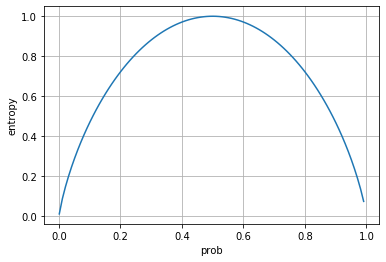

In [29]:
# pの値を0.001から0.999まで0.01刻みで動かす
p = np.arange(0.001, 0.999, 0.01)

# グラフ化
plt.plot(p, calc_entropy(p)) 
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

ここまでの説明で、エントロピーが識別の不純度を表すということを説明しました。先ほどのキノコのデータでエントロピーを計算してみましょう。扱っているデータセットは合計で8124行ありました。目的変数`flg`がカテゴリを表すので、そのデータをカウントします。

In [30]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

上記より、毒でないキノコ（0）は4208個、毒キノコ（1）は3916個とわかります。よって毒キノコでない割合は0.518（=4208/8124）、毒キノコである割合は0.482（=3916/8124）となるので、エントロピーの初期値は以下の通り、0.999であることがわかります。

In [31]:
entropy_init = - (0.518 * np.log2(0.518) + 0.482 * np.log2(0.482))
print('毒キノコデータのエントロピーの初期値: {:.3f}'.format(entropy_init))

毒キノコデータのエントロピーの初期値: 0.999


### 7.5.4 情報利得：分岐条件の有益さを測る

エントロピーは1に近いほど識別がされていない状態、0に近いほど識別がよくされている状態でした。次に考えるべきことは、どの説明変数を分岐に用いたら不純度（キノコデータでは初期時点で0.999）をより小さくできるのかということです。そこで押さえるべき概念が**情報利得（information gain）**です。情報利得とは、ある変数を使ってデータ分割するとき、そのデータ分割前後でどれだけエントロピーが減少したかを表す指標です。先程と同様、`cap_color_c`と`gill_color_b`の2つの変数を使い、どちらの変数が分岐条件として有益なのかを情報利得を用いて示します。まず、`cap_color`が`c`であるか否かの2つのグループに分岐し、それぞれにおける毒キノコ割合を計算しエントロピーを計算してみます。

In [32]:
mushroom_dummy.groupby(['cap_color_c', 'flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [33]:
# cap_colorがcでない場合のエントロピー
p1 = 4176 / (4176 + 3904)
p2 = 1 - p1
entropy_c0 = - (p1 * np.log2(p1) + p2 * np.log2(p2))
print('entropy_c0: {:.3f}'.format(entropy_c0))

entropy_c0: 0.999


In [34]:
# cap_colorがcである場合のエントロピー
p1 = 32 / (32 + 12)
p2 = 1 - p1
entropy_c1 = - (p1 * np.log2(p1) + p2 * np.log2(p2))
print('entropy_c1: {:.3f}'.format(entropy_c1))

entropy_c1: 0.845


分割する前の全体のエントロピーは0.999でした。ここで分割する前のデータを親データセット、分割したデータを子のデータセットと呼ぶとした場合、情報利得を「**親データセットのエントロピー - Σ{(子データセットのサイズ/親データセットのサイズ)×子のデータセットのエントロピー}**」と定義します。この値が大きければ大きいほど、分割前後でエントロピーの低下が大きいため、より有益な分岐条件であるとわかるのです。実際に、Σ{(子データセットのサイズ/親データセットのサイズ)×子のデータセットのエントロピー}の部分を計算すると、次のようになります。

In [35]:
entropy_after = (4176 + 3904) / 8124 * entropy_c0 + (32 + 12) / 8124 * entropy_c1
print('データ分割後の平均エントロピー: {:.3f}'.format(entropy_after))

データ分割後の平均エントロピー: 0.998


この結果、情報利得はデータ分割前後のエントロピーの差として、以下の通り0.001であることが確認でき、あまりエントロピーが減少していないことがわかります。cap_colorがcかどうかはそれほど有益な分岐条件ではなさそうということを定量的に表現できました。

In [36]:
print('変数cap_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

変数cap_colorの分割によって得られる情報利得: 0.001


一方、`gill_color`が`b`であるかどうかの情報利得を計算すると、以下の通り0.269となります。上記の分岐条件よりもエントロピーを大きく低下させられる、より有益な分岐条件とわかります。下記で一点留意されたいのは、`gill_color`が`b`である場合のエントロピーの計算です。エントロピーの定義は、厳密には空ではないカテゴリについて計算するという条件があります。`gill_color`が`b`である場合、`flg`変数が0となるサンプルはありませんから、エントロピー計算の$Σ$に$p1*np.log2(p1)$を含めていません。

In [37]:
mushroom_dummy.groupby(['gill_color_b', 'flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [38]:
# gill_colorがbでない場合のエントロピー
p1 = 4208 / (4208 + 2188)
p2 = 1 - p1
entropy_b0 = - (p1 * np.log2(p1) + p2 * np.log2(p2))

# gill_colorがbである場合のエントロピー
p1 = 0 / (0 + 1728)
p2 = 1 - p1
entropy_b1 = - (p2 * np.log2(p2))

entropy_after = (4208 + 2188) / 8124 * entropy_b0 + (0 + 1728) / 8124 * entropy_b1
print('変数gill_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

変数gill_colorの分割によって得られる情報利得: 0.269


以上で決定木の生成プロセス（条件分岐の優劣の決め方）を確認しました。情報利得が一番大きい分岐条件でデータを分割し、更に分割先でも同様に情報利得を最大とする分岐条件を探索してくれるのが決定木であることを理解しましょう。これまで不純度を表す指標としてエントロピーを紹介しましたが、他にも**ジニ不純度（Gini impurity）、分類誤差（classification error）**などがあります。ジニ不純度は、確率・統計の総合問題で出てきたジニ係数と関わりがあります。本講義では詳細は割愛しますので、興味がある方は調べてみてください。

>**[やってみよう]**
>
>ジニ不純度、分類誤差（誤分類率）について調べてみましょう。それぞれどんな指標でしょうか。また、決定木のモデルを構築するときに反映させるにはどうすればいいでしょうか。

なお前節（7.4 正則化項のある回帰：ラッソ回帰、リッジ回帰）において、モデルの複雑さについて言及しましたが、決定木の場合のモデルの複雑さは分岐数で決定されます。多くの分岐を許容するほど複雑なモデルになること覚えておきましょう。

### 7.5.5 決定木のモデル構築

決定木の動きを理解したところで、決定木のモデル構築をしていきましょう。`sklearn.tree`モジュールの`DecisionTreeClassifier`クラスを使うことで、決定木モデルを構築できます。下記のプログラムでは`DescriptionTreeClasifier`クラスを使う際、パラメータの`criteroin`に'`entropy`'を指定することで、分岐条件の指標としてエントロピーを設定しています。

In [39]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# データ分割
X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.883
正解率(test):0.894


結果はテストデータで89%ほどの正解率です。決定木の分岐数決定のパラメータに`max_depth`があり、上記では5にしています。深ければ当然、条件分岐数の上限も増えます。正解率を高めるべくより複雑なモデルにしたい場合は深い木を作ればよいでしょう（ただし、あまり深い木を作ると過学習の危険性が増すので注意しましょう）。また決定木は、モデルを構築する際に他のモデルでは必須となる標準化処理をしなくても結果は変わりません。

なお参考ですが、以下のように決定木の結果を可視化できます（このプログラムを実行するには`pydotplus`と`graphviz`のパッケージをインストールしておく必要がありますが、環境の設定が難しいため、本講義では割愛します。）。

下記の可視化した結果を見るとわかるように、条件分岐が繰り返され、2分木の形になっていることがわかります。木に書かれている四角形は上から読みます。一番上の変数（$X[0]$、ここでは説明変数の1番目のカラムの`gill_color_b`）が0.5より大きいときには右の`False`に進み、その子データセットのサンプル数は1302になり、エントロピーは0になっています。これは`gill_color_b`のフラグが1（$X[0]<=0.5$は`False`になる）のときは、毒キノコになるという分岐に相当します。

In [40]:
# 参考プログラム
# pydotplusやgraphvizをインストールする必要があります
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

ModuleNotFoundError: No module named 'pydotplus'

参考文献「A-19」の『戦略的データサイエンス入門 ―ビジネスに活かすコンセプトとテクニック』は、この決定木を説明するのに参考にした書籍です。他の項目でも紹介しましたが、わかりやすく書いてあるのでオススメです。

####  <練習問題 7-6>
`sklearn.datasets`モジュールの`load_breast_cancer`関数から乳がんデータを読み込み、目的変数を`cancer.target`、説明変数を`cancer.data`として、決定木のモデルを構築し、訓練スコアとテストスコアを確認してください。木の深さなどのパラメータを変更し結果を比較してみてください。

## 7.6 k-NN（k近傍法）
キーワード：k-NN、怠惰学習、memory-based learning

本節では、**k-NN（k-Nearest Neighbor：k近傍法）**について学びます。たとえば、あるグループAとグループBがあり、その人たちの属性がわかっているとして、どちらのグループに属するか分からない新しい人が来たケースを考えます。

ここでその人がAとBのどちらのグループに属するか考える際、その人と属性が近いk人を選び、その人たちがグループAに多いのかそれともグループBに多いのかを調べて、多い方を新しい人のグループにするというのがk-NNによる分類方法です。k-NNのkは決定に利用する人数に相当します。k-NNは怠惰学習やmemory-based learningとも言われ、訓練データをそのまま覚えて学習します。



### 7.6.1 k-NNのモデル構築

それでは、k-NNを使ってモデル構築をしていきましょう。`sklearn.neibors`モジュールの`KNeighborsClassifier`クラスを使います。データ例としては乳がんに関するデータセットを使います。乳がんに関するデータセットは`load_breast_cancer`関数で取得できます。

ここでは`k`を1から20まで変化させ、訓練データとテストデータの正解率の変化を見ています。`k`が小さい時は正解率に乖離がありますが、6～8あたりで訓練とテストの正解率が近くなります。それ以上増やしてもモデル精度に大きな変化は見られません。精度に改善が見られない場合、あまりkを大きくする必要はないので、本ケースにおいては6～8程度に設定しておくのが良さそうです。なお、以下は分類タスクにおけるモデル構築の例ですが、回帰の場合は`KNeighborsRegressor`クラスを使います。

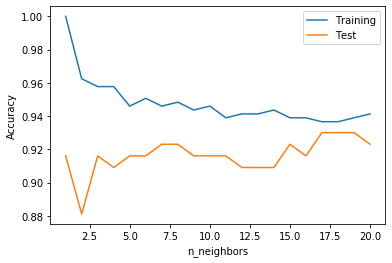

In [41]:
# データやモデルを構築するためのライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データセットの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
# stratifyは層化別抽出
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# グラフ描画用のリストを用意
training_accuracy = []
test_accuracy = []

# 学習
for n_neighbors in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

# グラフを描画
plt.plot(range(1, 21), training_accuracy, label='Training')
plt.plot(range(1, 21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

>**[やってみよう]**
>
>k-NNの回帰はどのように計算されるか調査してみましょう。

####  <練習問題 7-7>
7.5「決定木」で扱ったキノコのデータに対してk-NNを使ってモデル構築して検証してみましょう。`k`パラメータを変更しながら実行してください。

####  <練習問題 7-8>
以前使った学生のテスト結果のデータ（student-mat.csv）を用いて、目的変数を`G3`、説明変数を以下で定義する`X`（学生の属性データを使用）として、k-NNの`k`パラメータを変えながら、どの`k`が最適か考えてみましょう。

目的変数は数値型での回帰となるので、`KNeighborsRegressor`を使ってください。回帰の場合、出力される値は近傍の`k`個のデータの平均になります。

In [ ]:
# インポート
import requests, zipfile
import os

# データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# データをurlから取得
r = requests.get(url, stream=True)

# zipfile内のstudent-mat.csvをカレントディレクトリ内のdataディレクトリに展開
with zipfile.ZipFile(io.BytesIO(r.content)) as existing_zip:
    existing_zip.extract('student-mat.csv', 'data')

# csvfileが存在するディレクトリ
data_dir = './data'

# student-mat.csvのpathを取得
path = os.path.join(data_dir, 'student-mat.csv')

student = pd.read_csv(path, sep=';')
X = student.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime'
                              , 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc'
                              , 'absences', 'G1', 'G2']].values

## 7.7 サポートベクターマシン
キーワード：サポートクター、マージン

**サポートベクターマシン（Support Vector Machine：SVM）**は、カテゴリを識別する境界線を、1本の線ではなく、マージンを持った線で引く手法です。たとえば、2つのグループを分ける境界線を引くとき、線の引き方は色々とあるのですが、それぞれのグループの中で最も境界線に近い点（サポートベクター）との距離（マージン）が最大化するように線を引くのがサポートベクターマシンです。


### 7.7.1 サポートベクターマシンのモデル構築

サポートベクターマシンを使ってモデルを構築してみましょう。サポートベクターマシンは`sklearn.svm`モジュールの`LinearSVC`クラスを使います。ここではデータ例として、k-NNのモデル構築で使ったのと同じ乳がんに関するデータセットを使います。

In [42]:
# SVMのライブラリ
from sklearn.svm import LinearSVC

# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split

# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train, y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.920
正解率(test):0.895


C:\Users\kenmei\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


サポートベクターマシンでは、標準化するとスコアが改善されることがあります。実際にやってみると改善していることがわかります。

In [43]:
# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train_std, y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.993
正解率(test):0.951


>**[やってみよう]**
>
>サポートベクターマシンで回帰を実施する（連続変数を予測する）場合は、どのクラスでモデル構築できるか調べてみましょう。

以上で、教師あり学習の各種モデル構築の方法の説明は終わりです。それぞれの手法についてのモデル構築の流れと、機械学習モデルの評価の考え方（訓練データに使わないデータで評価する）についての理解を確認しましょう。

####  <練習問題 7-9>
乳がんデータセットについて、`sklearn.svm`モジュールの`SVC`クラスを使って、`cancer.target`を予測するモデルを構築しましょう。`model = SVC(kernel='rbf', random_state=0, C=2)`としてみてください。モデルを構築したら、訓練データとテストデータに分けて標準化し、スコアを確認してください。

## 7.8 総合問題

### ■ 総合問題7-1 教師あり学習の用語（1）

教師あり学習に関する用語について、それぞれの役割や意味について述べてください。どのような場面で使いますか？ネットや参考文献等を使って調べてみてください。
- 回帰
- 分類
- 教師あり学習
- 重回帰分析
- ロジスティック回帰分析
- 正則化
- リッジ回帰
- ラッソ回帰
- 決定木
- エントロピー
- 情報利得
- k-NN法
- SVM
- ノーフリーランチ

### ■ 総合問題7-2 決定木
`sklearn.datasets`モジュールの`load_iris`関数を使ってアヤメの花のデータセットを読み込み、目的変数を`iris.target`、説明変数を`iris.data`として、決定木のモデルを使って予測と検証を実施してください。

### ■ 総合問題7-3 ノーフリーランチ
これまで数学の成績データや乳がんデータなど、さまざまなデータを扱ってきました。これらのデータに対して、ロジスティック回帰分析やSVMなど今まで学んだモデルを試し、どれが一番スコアが高いかを確認しましょう。データによって、一番良いスコアが出るモデルは異なりますが、その特徴はどんなものか、考察してください。これをノーフリーランチといい、どんなデータに対しても、一番良いモデルになるモデルはないということを意味します。